## sprint0: global

- setting random_state

In [ ]:
import numpy as np
import tensorflow as tf


In [ ]:
# setting random_state
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)


- libraries


In [ ]:
# libraries
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import keras as kr, keras


- utils

In [ ]:
# fix random_state
def fixRandomState(fixed_state: int = RANDOM_STATE):
  np.random.seed(fixed_state)
  tf.random.set_seed(fixed_state)

# exception
def exception(condition: bool, notification):
  if(condition == False):
    print("__exception__: ", notification)
    assert(1 == 0)

def catchException(ex: Exception):
  print(type(ex))    # the exception type
  print(ex.args)     # arguments stored in .args
  exception(False, ex)

# message
def mesVerbose(flag: bool, verbose):
  if(flag):
    print("__verbose__: ", verbose)

def mesNote(note):
  print("__note__: ", note)


- View

In [ ]:
class View:
  # Singleton Pattern
  _instance = None
  def __new__(cls):
      if cls._instance is None:
          cls._instance = super(View, cls).__new__(cls)
      return cls._instance

  def over(self, val) -> tuple:
    try:
      return type(val), val.shape
    except:
      return type(val), ()

  def architect(self, model, filename = 'model.png'):
    return kr.utils.plot_model(model, filename, show_dtype=True,
      show_layer_activations=True, show_layer_names=True,
      show_shapes=True, show_trainable=True)

view = View()

- NPUtils

In [ ]:
import math
class NPUtils:
  # Singleton Pattern
  _instance = None
  def __new__(cls):
      if cls._instance is None:
          cls._instance = super(NPUtils, cls).__new__(cls)
      return cls._instance

  def isNP(self, val) -> bool:
    return isinstance(val, np.ndarray)
  def isTF(self, val) -> bool:
    return isinstance(val, tf.Tensor)

  def hashNP(self, val: np) -> tuple:
    round_number = 9
    return round(np.sqrt(np.sum(val**2)), round_number), round(np.sum(val), round_number)

  # to Matrix with len(shape) = 2 and type = numpy
  def convertToMatrix(self, _val) -> np:
    val = _val.copy()
    try:
      if(self.isNP(val) == False): val = val.numpy()
      if(len(val.shape) > 2):
        m = 1
        for l in val.shape: m *= l
        val = np.resize(val, (int(math.sqrt(m)), m // int(math.sqrt(m))))
      elif(len(val.shape) < 2):
        val = val.reshape(val.shape[0], 1)
      return val
    except Exception as ex: catchException(ex)

  def show(self, _val, scale = -1) -> None:
    val = _val.copy()
    verbose = True
    try:
      mesVerbose(verbose, view.over(val))
      val = self.convertToMatrix(val)

      if(scale != -1):
        plt.figure(figsize=(scale, scale*val.shape[1]/val.shape[0]))

      def_fontsize = plt.rcParams['font.size']
      plt.rcParams['font.size'] = 4
      plt.imshow(val, cmap = 'viridis')
      plt.show()
      plt.rcParams['font.size'] = def_fontsize
    except Exception as ex: catchException(ex)

npu = NPUtils()

## sprint1: try Funtional API

### uisng Available Model

In [ ]:
# using available model
vgg19 = keras.applications.VGG19()


574710816/574710816 [==============================] - 20s 0us/step


### extract Unit Layer

In [ ]:
# extract parameters of model
param_list = [np.array(layer.get_weights())  for layer in vgg19.layers[:5]]
# param_list

<ipython-input-14-1dba2da11b24>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  param_list = [np.array(layer.get_weights())  for layer in vgg19.layers[:5]]


In [ ]:
view.over(param_list[1])

(numpy.ndarray, (2,))

In [ ]:
# extract input_interface
layer_input_list = [layer.input for layer in vgg19.layers[:5]]
layer_input_list

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>]

In [ ]:
# extract output_interface
layer_output_list = [layer.output for layer in vgg19.layers[:5]]
layer_output_list

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>]

In [ ]:
# extract layer operations
layers = [layer for layer in vgg19.layers[:5]]
layers

In [ ]:
# connect by Model class
img = np.random.random((1, 224, 224, 3)).astype("float32")

operation = kr.Model(layers[0].input, layers[4].output) #$ operation
# layers[4](layers[0].input) #$ call, create abstraction data
# operation = kr.Model(layers[4].input, layers[0].output) #$ connect

print(view.over(layers[0](img))) #$ call, create practical data
print(view.over(operation.predict(img)))

(<class 'tensorflow.python.framework.ops.EagerTensor'>, TensorShape([1, 224, 224, 3]))
1/1 [==============================] - 2s 2s/step
(<class 'numpy.ndarray'>, (1, 112, 112, 128))


__verbose__:  (<class 'numpy.ndarray'>, (1, 224, 224, 3))


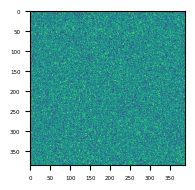

1/1 [==============================] - 0s 19ms/step
__verbose__:  (<class 'numpy.ndarray'>, (1, 112, 112, 128))


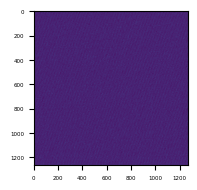

In [ ]:
# show
npu.show(img, scale = 2)
npu.show(operation.predict(img), 2)

In [ ]:
# view architect
operation.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
Total params: 112576 (439.75 KB)
Trainable params: 112576 (439.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


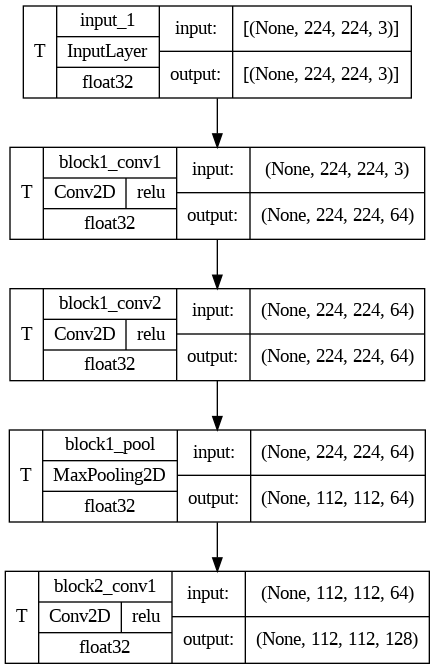

In [ ]:
view.architect(operation)

##sprint2: try GradientTape to automatic compute gradient

In [ ]:
x = tf.constant(5.0)
with tf.GradientTape() as g:
  g.watch(x)
  with tf.GradientTape() as gg:
    gg.watch(x)
    y = x * x
  dy_dx = gg.gradient(y, x)  # dy_dx = 2 * x
d2y_dx2 = g.gradient(dy_dx, x)  # d2y_dx2 = 2
print(dy_dx)

print(d2y_dx2)


tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
x = tf.ragged.constant([[1.0, 2.0], [3.0]])
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x
  print(x * x)
g.gradient(y, x)


<tf.RaggedTensor [[1.0, 4.0], [9.0]]>


<tf.RaggedTensor [[2.0, 4.0], [6.0]]>

In [ ]:
W = np.array([[1, 2, 3], [2, 3, 1]])
x = np.array([[1], [2], [3]])
np.matmul(W, x)

array([[14],
       [11]])

In [ ]:
W = tf.constant(W)
x = tf.constant(x)
np.matmul(W, x)

array([[14],
       [11]])

In [ ]:
x = tf.cast(x, tf.float32)
W = tf.cast(W, tf.float32)
print("x shape: ", x.shape)
print("W shape: ", W.shape)
with tf.GradientTape() as gt:
  gt.watch(x)
  gt.watch(W)
  a = tf.matmul(W, x)
  print("a: ", a)


x shape:  (3, 1)
W shape:  (2, 3)
a:  tf.Tensor(
[[14.]
 [11.]], shape=(2, 1), dtype=float32)


In [ ]:
gt.gradient(a, x)

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[3.],
       [5.],
       [4.]], dtype=float32)>

In [ ]:
gt.gradient(a, W)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [1., 2., 3.]], dtype=float32)>